# Linear regression

In [1]:
#importing the neccessary libraries

import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import statsmodels.api as sm

import sklearn
from sklearn.linear_model import LinearRegression  
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split

#### 1. Load the provided .npy files. You can load it with numpy.
 - each file contains one vector, X and y
 - visualize X vs y on a scatter plot
 - fit an $y = w_0 + w_1\cdot X + w_2 \cdot X^2$ linear regression using sklearn

In [2]:
#loading the data

X = np.load('X.npy')
y = np.load('y.npy')

X = X[:,np.newaxis]
y = y[:,np.newaxis]

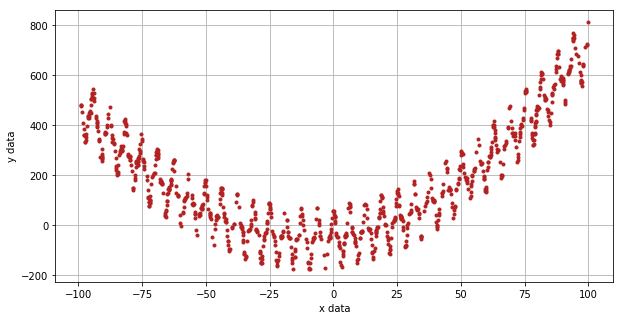

In [3]:
#plotting the data, so we have an idea what the ranges are, what kind of function we should fit

plt.figure(figsize=(10,5))
plt.plot(X,y, 'o', color = 'firebrick', markersize = 3)
plt.grid()
plt.ylabel('y data')
plt.xlabel('x data')
plt.show()

In [4]:
#splitting the dataset into training and testing datasets
#we fit the function on the train dataset
#and check the fit on the test dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
#we need a second degree fitting, so degree = 2

nb_degree = 2
polynomial_features = PolynomialFeatures(degree = nb_degree)

#we need to transform the data for the linear regression

X_TRANSF_train = polynomial_features.fit_transform(X_train)
X_TRANSF_test = polynomial_features.fit_transform(X_test)

In [6]:
#and finally the regression:

model = LinearRegression()
model.fit(X_TRANSF_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
#after the fitting, we need to predict the dataset from the test data
#just to check the results, we also predict the training dataset from the fitting values

Y_NEW_train = model.predict(X_TRANSF_train)
Y_NEW_test = model.predict(X_TRANSF_test)

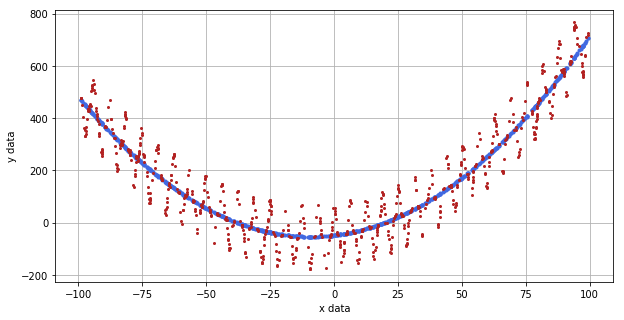

In [8]:
#the polynomial linear regression is seen in the following graph

plt.figure(figsize=(10,5))
plt.plot(X_train, Y_NEW_train, 'o', color = 'royalblue', markersize = 3)
plt.plot(X_train, y_train, 'o', color = 'firebrick', markersize = 2)
plt.grid()
plt.ylabel('y data')
plt.xlabel('x data')
plt.show()

#### 2. Using different features
 - plot the residuals (the difference between the prediction and the actual $y$) vs the original $y$
 - a non-random-noise like pattern suggests non-linear connection between the features and the predictions
 - someone told us that the connection between X and y is $y = A \cdot X + B \cdot \cos^3(X) + C\cdot X^2 + D$
    - using sklearn's linear regression estimate $A, B, C, D$!
 - plot the residuals again! is it better now?

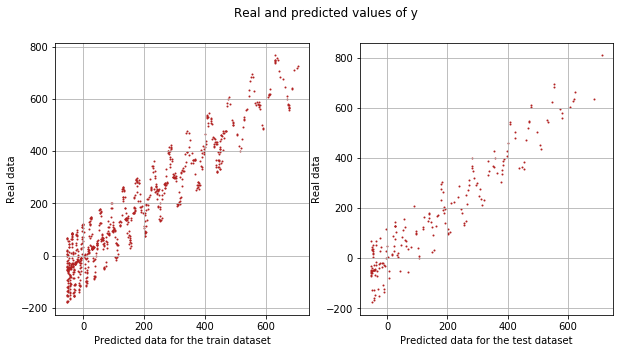

In [9]:
#the distances between the real and predicted data are seen in the following graphs:

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
fig.suptitle('Real and predicted values of y')

ax1.scatter(Y_NEW_train, y_train, color = 'firebrick', s = 1)
ax1.set_xlabel('Predicted data for the train dataset')
ax1.set_ylabel('Real data')
ax1.grid()

ax2.scatter(Y_NEW_test, y_test, color = 'firebrick', s = 1)
ax2.set_xlabel('Predicted data for the test dataset')
ax2.set_ylabel('Real data')
ax2.grid()

In [10]:
#since the connection is pattern-like, it must be non-linear
#let's search for the parameters in the following function: y = A*X + B*cos^3(X) + C*X^2 + D
#let's tranfrom the data!

X_cos_transf = []

for i in range(0,len(X)):
    x_temp = []
    x_temp.append(1)
    x_temp.append(X[i][0])
    x_temp.append(math.cos(X[i][0])**3)
    x_temp.append(X[i][0]**2)
    X_cos_transf.append(x_temp)

In [11]:
#splitting the dataset into traning and testing data

X_train_cos, X_test_cos, y_train_cos, y_test_cos = train_test_split(X_cos_transf, y, test_size=0.2, random_state=0)

#the regression:

model = LinearRegression()
model.fit(X_train_cos, y_train_cos)

#after the fitting, we need to predict the dataset from the test data
#just to check the results, we also predict the training dataset from the fitting values

Y_NEW_cos_train = model.predict(X_train_cos)
Y_NEW_cos_test = model.predict(X_test_cos)

model.coef_, model.intercept_

(array([[0.00000000e+00, 1.19615050e+00, 1.23946175e+02, 6.56592758e-02]]),
 array([-49.96575268]))

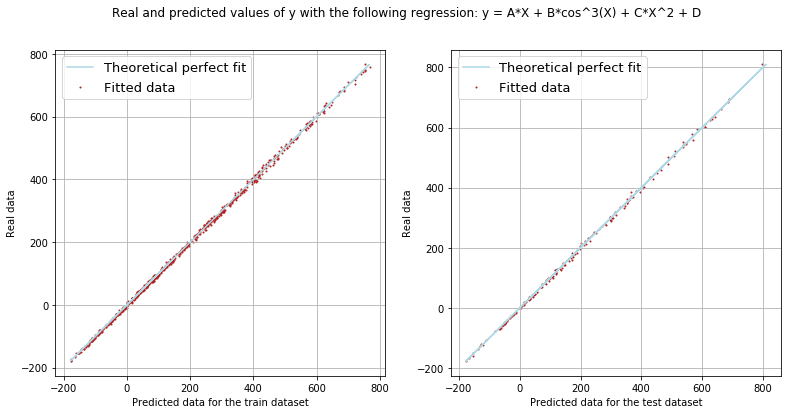

In [12]:
#the distances between the real and predicted data are seen in the following graphs:

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,6))
fig.suptitle('Real and predicted values of y with the following regression: y = A*X + B*cos^3(X) + C*X^2 + D')

ax1.scatter(Y_NEW_cos_train, y_train_cos, color = 'firebrick', s = 1, label = 'Fitted data')
ax1.plot(y_train_cos, y_train_cos, color = 'lightblue', label = 'Theoretical perfect fit')
ax1.set_xlabel('Predicted data for the train dataset')
ax1.set_ylabel('Real data')
ax1.grid()
ax1.legend(prop={'size': 13})

ax2.scatter(Y_NEW_cos_test, y_test_cos, color = 'firebrick', s = 1, label = 'Fitted data')
ax2.plot(y_test_cos, y_test_cos, color = 'lightblue', label = 'Theoretical perfect fit')
ax2.set_xlabel('Predicted data for the test dataset')
ax2.set_ylabel('Real data')
ax2.grid()
ax2.legend(prop={'size': 13})

plt.show()

As it's seen, the fitted functions are much better now, then with the simple polynomial linear regression.

#### 3. Other methdods than sklearn for linear regression
 - using the statsmodels package perform the same linear regression as in 2.) (hint: use statsmodels.api.OLS)
 - is the result the same? if not guess, why? (did you not forget to add the constant term?)
 - try to get the same results with statsmodels as with sklearn!
 - using the analytic solution formula shown during the lecture, calculate the coefficients (A, B, C, D). are they the same compared to the two previous methods?

In [13]:
#using sm OLS for the new linear regression

X_train_stats, X_test_stats, y_train_stats, y_test_stats = train_test_split(X_cos_transf, y, test_size=0.2, random_state=0)

model2 = sm.OLS(y_train_stats,X_train_stats)
results = model2.fit()

print('The parameters of the stasmodels method: ', results.params)
print('The parameters of the sklearn method: ', model.intercept_, model.coef_[0][1:4])

#as it's seen, the parameters are the same

The parameters of the stasmodels method:  [-4.99657527e+01  1.19615050e+00  1.23946175e+02  6.56592758e-02]
The parameters of the sklearn method:  [-49.96575268] [1.19615050e+00 1.23946175e+02 6.56592758e-02]


In [14]:
#let's try to get the parameters from the matrices:
#first, we will need np.arrays:

X_matrix_np = []
for i in range(0,len(X_train_cos)):
    X_matrix_np.append(np.array(X_train_cos[i]))
    
x_matrix = np.array(X_matrix_np)


#let's calculate the transpose of the     

x_transpose = np.matrix.transpose(x_matrix)


#now we can finally calculate the w matrix:

first_product = np.linalg.inv(np.matmul(x_transpose, x_matrix))
second_product = np.matmul(first_product, x_transpose)

w = second_product.dot(y_train_cos)

print('The manually calcualted weights:')
print()
print(w)

The manually calcualted weights:

[[-4.99657527e+01]
 [ 1.19615050e+00]
 [ 1.23946175e+02]
 [ 6.56592758e-02]]


As it's seen, they are the exact same again.

#### 4. 
 - load the real_estate.csv to a pandas dataframe
 - drop the ID column and the geographic location columns
 - fit a linear regression model to predict the unit price using sklearn

In [15]:
#reading in the datset to pandas

data = pd.read_csv('real_estate.csv')
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [16]:
#dropping the non important columns

data_dropped = data.drop(columns = ['No', 'X5 latitude', 'X6 longitude'])
data_dropped.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2
2,2013.583,13.3,561.98450,5,47.3
3,2013.500,13.3,561.98450,5,54.8
4,2012.833,5.0,390.56840,5,43.1


In [17]:
#getting the values to lists

y = list(data_dropped['Y house price of unit area'])

x1 = list(data_dropped['X1 transaction date'])
x2 = list(data_dropped['X2 house age'])
x3 = list(data_dropped['X3 distance to the nearest MRT station'])
x4 = list(data_dropped['X4 number of convenience stores'])


#creating a matrix with the x values 

x_matrix = [x1, x2, x3, x4]

x_matrix_trans = list(map(list, zip(*x_matrix)))

xtr, xte, ytr, yte = train_test_split(x_matrix_trans, y, test_size=0.4, random_state=0)


#finally the linear regression

lr = LinearRegression()
lr.fit(xtr, ytr)

lr_pred = lr.predict(xte)
lr_pred_train = lr.predict(xtr)

#### 5. 
 - interpret the coefficients and their meaning shortly with your own words
 - plot the residuals for the predictions. if you had to decide only on this information, which house would you buy?

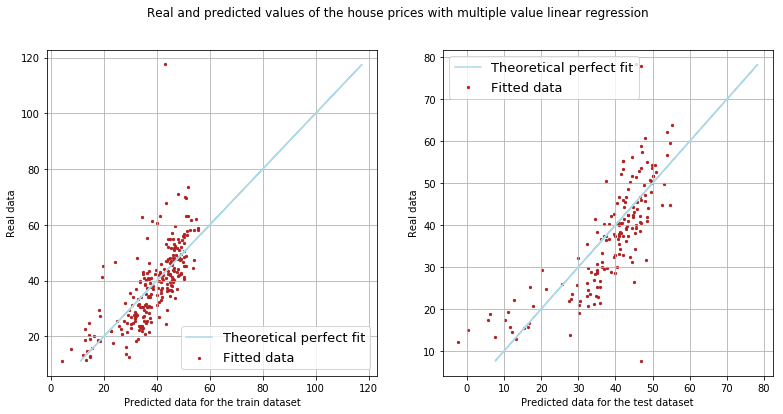

In [18]:
#the distances between the real and predicted data are seen in the following graphs:

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,6))
fig.suptitle('Real and predicted values of the house prices with multiple value linear regression')

ax1.scatter(lr_pred_train, ytr, color = 'firebrick', s = 5, label = 'Fitted data')
ax1.plot(ytr, ytr, color = 'lightblue', label = 'Theoretical perfect fit')
ax1.set_xlabel('Predicted data for the train dataset')
ax1.set_ylabel('Real data')
ax1.grid()
ax1.legend(prop={'size': 13})

ax2.scatter(lr_pred, yte, color = 'firebrick', s = 5, label = 'Fitted data')
ax2.plot(yte, yte, color = 'lightblue', label = 'Theoretical perfect fit')
ax2.set_xlabel('Predicted data for the test dataset')
ax2.set_ylabel('Real data')
ax2.grid()
ax2.legend(prop={'size': 13})

plt.show()

In [19]:
print('The parameters of the sklearn method:')
print()
print(lr.intercept_)
print(lr.coef_)

The parameters of the sklearn method:

-13105.435266887918
[ 6.53241562e+00 -2.57549521e-01 -6.23769626e-03  1.09024689e+00]


We successfully calculated the weights for the multiple coefficient linear regression. As it's seen in the graphs, the values follow a sort of linear tendency but they are not even close to being perfect. We shall not be suprised, since this is a very primitive model, only considering some factors regarding the house prices. 

These weights give us a very useful insight on the house prices however. The first weight, which belongs to the transaction date is a positive number. This means that as we progress in time, the later the house is sold, the higher the price is. We don't need to be data scientists to know this, as house prices are mainly increasing in time. The next factor is the house age. This is a negative number, very close to zero. This implies that as the house gets older and older, the price decreases. It's important to notice that since this number is close to zero, it won't make a significant difference, if we don't sell the house in 2020, but in 2021 - the price is only going to decrease by a small amount. 

The remaining two factors can be interpreted the exact same way, as the first two. 

Let's choose a house to buy! If a house is valued at a high price, it means that it's close to the public transportation, quite new and has some stores nearby. This is an ideal place to live at. Since our model is not incredibly accurate, it might under- or overvalue the price of the house. 

If we buy a house above the linear function, that means that the predicted value is much lower than the actual price. There might not be any shops nearby, or the house could have been built in 1960. I'd positively not buy a house from this area of the function - when only considering these four factors. If one buys a house, which is located under the linear function, that means that the predicted price is higher than the actual price. This could be a good choice, since an MRT station and a shop is nearby and it was built a short time ago. As I mentioned before, there are some other factors which one must consider when buying a house but regarding only these four factors, I'd absolutely buy a house from under the linear function. 